<a href="https://colab.research.google.com/github/akimi-yano/Creature_Image_Classification/blob/main/Creature_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

opencv_tf_project_1_image_classification_round_3_path = kagglehub.competition_download('opencv-tf-project-1-image-classification-round-3')

print('Data source import complete.')


100%|██████████| 127M/127M [00:08<00:00, 15.2MB/s]

Extracting files...


Data source import complete.


In [3]:
! pip install -q kaggle

In [38]:
from google.colab import files
files.upload()

{}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
!ls ~/.kaggle

kaggle.json


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle competitions download -c opencv-tf-project-1-image-classification-round-3

 99% 126M/127M [00:06<00:00, 24.5MB/s]
100% 127M/127M [00:06<00:00, 19.6MB/s]


In [10]:
!unzip opencv-tf-project-1-image-classification-round-3.zip -d dataset/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset/Test/8799458.jpg  
  inflating: dataset/dataset/Test/8800161.jpg  
  inflating: dataset/dataset/Test/8802353.jpg  
  inflating: dataset/dataset/Test/8831173.jpg  
  inflating: dataset/dataset/Test/8844779.jpg  
  inflating: dataset/dataset/Test/8847068.jpg  
  inflating: dataset/dataset/Test/8860816.jpg  
  inflating: dataset/dataset/Test/8861351.jpg  
  inflating: dataset/dataset/Test/8867084.jpg  
  inflating: dataset/dataset/Test/8867449.jpg  
  inflating: dataset/dataset/Test/8872114.jpg  
  inflating: dataset/dataset/Test/8872787.jpg  
  inflating: dataset/dataset/Test/8881235.jpg  
  inflating: dataset/dataset/Test/8883074.jpg  
  inflating: dataset/dataset/Test/8896315.jpg  
  inflating: dataset/dataset/Test/8898763.jpg  
  inflating: dataset/dataset/Test/8905967.jpg  
  inflating: dataset/dataset/Test/8912624.jpg  
  inflating: dataset/dataset/Test/8913259.jpg  
  inflating: dataset/dataset/Test/892

In [11]:
import os
data_root = './dataset/dataset'
os.path.exists(data_root)
for elem in os.walk(data_root):
  print(elem)

('./dataset/dataset', ['Valid', 'Test', 'Train'], [])
('./dataset/dataset/Valid', ['spider', 'elephant', 'horse', 'cow'], [])
('./dataset/dataset/Valid/spider', [], ['7474831.jpg', '9157119.jpg', '1713594.jpg', '8697299.jpg', '2398618.jpg', '8496354.jpg', '4089299.jpg', '3590486.jpg', '2335882.jpg', '8211069.jpg', '7174129.jpg', '4593424.jpg', '8852261.jpg', '3172246.jpg', '8974958.jpg', '7030124.jpg', '8675676.jpg', '3326766.jpg', '7293804.jpg', '1614403.jpg', '3831192.jpg', '4984578.jpg', '7312872.jpg', '7380232.jpg', '7352440.jpg', '1108396.jpg', '9286186.jpg', '8503573.jpg', '8140908.jpg', '6626718.jpg', '3414366.jpg', '2900544.jpg', '1294601.jpg', '2649680.jpg', '4563934.jpg', '9074698.jpg', '3803093.jpg', '9080918.jpg', '8308789.jpg', '3265751.jpg', '6416161.jpg', '6607358.jpg', '5188467.jpg', '3662935.jpg', '3484652.jpg', '8064830.jpg', '7589771.jpg', '6582657.jpg', '7601608.jpg', '2461103.jpg', '1631424.jpg', '3538587.jpg', '1787192.jpg', '7055663.jpg', '8597171.jpg', '7037898.

In [12]:
!pip install tensorflow==2.15.0.post1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [13]:
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from dataclasses import dataclass
import platform

# Text formatting
bold = "\033[1m"
end = "\033[0m"

block_plot=False

%matplotlib inline

### <font style="color:green">Set Seeds</font>

In [14]:
def set_seeds():
    # fix random seeds
    SEED_VALUE = 42

    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    tf.random.set_seed(SEED_VALUE)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

#     physical_devices = tf.config.list_physical_devices("GPU")
#     try:
#         tf.config.experimental.set_memory_growth(physical_devices[0], True)
#     except:
#         # Invalid device or cannot modify virtual devices once initialized.
#         pass

    return

set_seeds()

In [15]:
# Creating a MirroredStrategy for distributed training.
# This strategy effectively replicates the model's layers on each GPU or other available devices,
# syncing their weights after each training step.
DISTRIBUTE_STRATEGY = tf.distribute.MirroredStrategy()

In [16]:
# Printing the number of devices that are in sync with the MirroredStrategy.
# This indicates how many replicas of the model are being trained in parallel.
print('Number of devices: {}'.format(DISTRIBUTE_STRATEGY.num_replicas_in_sync))

Number of devices: 1


In [17]:
def data_augmentation_preprocess():
    # Define the data augmentation pipeline
    data_augmentation_pipeline = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),    # Random horizontal flip
        tf.keras.layers.RandomRotation(0.1),         # Random rotation (up to 10 degrees)
    ])

    return data_augmentation_pipeline

In [18]:
# Setup Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
])

In [19]:
def get_data(*, data_root, target_size=(224, 224), batch_size=32, data_augmentation=False):
    train_path = os.path.join(data_root, "Train")
    train_dataset = image_dataset_from_directory(
        train_path,
        label_mode='categorical',
        color_mode='rgb',
        batch_size=batch_size,
        image_size=target_size,
        shuffle=True,
    )

    valid_path = os.path.join(data_root, "Valid")
    valid_dataset = image_dataset_from_directory(
        valid_path,
        label_mode='categorical',
        color_mode='rgb',
        batch_size=batch_size,
        image_size=target_size,
        shuffle=False,
    )

    if data_augmentation:
        data_augmentation_pipeline = data_augmentation_preprocess()
        train_dataset = train_dataset.map(lambda x, y: (data_augmentation_pipeline(x), y))

    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
    valid_dataset = valid_dataset.prefetch(tf.data.AUTOTUNE)


    return train_dataset, valid_dataset

### <font style="color:green">Training Configuration</font>

In [20]:
@dataclass
class TrainingConfig:
    # Defining the batch size for model training.
    # The batch size is set to be some integer times the  number of devices in synchronization as per the distributed strategy.
    # This means that the overall batch of data is divided equally across all the devices used in the distributed training.
    # By scaling the batch size with the number of replicas (devices), each device processes a batch of size, in this case, 4.

    # This approach helps in efficient utilization of the computational power of all the devices involved in training.
    BATCH_SIZE: int = 32

    EPOCHS: int = 111

    LEARNING_RATE: float = 0.001

    # For tensorboard logging and saving checkpoints
    root_log_dir = os.path.join("Logs_Checkpoints", "Model_logs")
    root_checkpoint_dir = os.path.join("Logs_Checkpoints", "Model_checkpoints")

    # Current log and checkpoint directory.
    log_dir = "version_0"
    checkpoint_initial = "version_0"

    # Use multiprocessing during training.
    use_multiprocessing: bool = True if platform.system() == "Linux" else False

    # Number of workers to use for training.
    num_workers: int = 4

### <font style="color:green">Dataset Configuration</font>

In [21]:
@dataclass
class DatasetConfig:
    # DATA_ROOT: str = r"/kaggle/input/opencv-tf-project-1-image-classification-round-3/dataset"
    DATA_ROOT: str = r"./dataset/dataset"
    DATA_SHAPE: tuple = (224, 224, 3)
    NUM_CLASSES: int = 4

### <font style="color:blue">Callbacks</font>

In [22]:
def get_callbacks(
    training_config=TrainingConfig(),
    monitor="val_loss",
    mode="min",
    save_weights_only=False,
    save_best_only=True,
):

    # Initialize tensorboard callback for logging.
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=training_config.log_dir,
        histogram_freq=20,
        write_graph=True,
        update_freq="epoch",
        write_images=True,
    )


    checkpoint_filepath = training_config.checkpoint_path

    # Update file path if saving best model weights.
    if save_weights_only:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "model.ckpt")
    else:
        checkpoint_filepath = os.path.join(checkpoint_filepath, "model.keras")

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=save_weights_only,
        monitor=monitor,
        mode=mode,
        save_best_only=save_best_only,
        verbose=0,
    )

    return [tensorboard_callback, model_checkpoint_callback]

## <font style="color:blue">Logging Setup</font>


In [23]:
def setup_log_directory(training_config=TrainingConfig()):
    '''Tensorboard Log, Model checkpoint directory Setup and Early stopping'''

    get_number = lambda path: path.replace(".keras", "").replace("version_", "")

    if os.path.isdir(training_config.root_log_dir):
        # Get all folders numbers in the root_log_dir
        folder_numbers = [int(get_number(folder)) for folder in os.listdir(training_config.root_log_dir)]

        # Find the latest version number present in the log_dir
        last_version_number = max(folder_numbers)

        # New version name
        version_name = f"version_{last_version_number + 1}"

    else:
        version_name = training_config.log_dir


    # Update the training config default directory
    training_config.log_dir        = os.path.join(training_config.root_log_dir,        version_name)
    training_config.checkpoint_path = os.path.join(training_config.root_checkpoint_dir, version_name)

    # Create new directory for saving new experiment version
    os.makedirs(training_config.log_dir, exist_ok=True)
    os.makedirs(training_config.root_checkpoint_dir, exist_ok=True)

    print(f"Logging at: {training_config.log_dir}")
    print(f"Model Checkpoint at: {training_config.checkpoint_path}")

    return training_config, version_name

## <font style="color:blue">Plot Loss and Accuracy</font>

In [24]:
def plot_history(
    train_loss=None,
    val_loss=None,
    train_metric=None,
    val_metric=None,
    colors=["blue", "green"],
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
    fig_size=(15, 10),
):

    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    fig.set_facecolor("white")

    # Loss Plots
    plt.subplot(2, 1, 1)

    train_loss_range = range(len(train_loss))
    plt.plot(
        train_loss_range,
        train_loss,
        color=f"tab:{colors[0]}",
        label=f"Train Loss",
    )

    valid_loss_range = range(len(val_loss))
    plt.plot(
        valid_loss_range,
        val_loss,
        color=f"tab:{colors[1]}",
        label=f"Valid Loss",
    )

    plt.ylabel("Loss")
    plt.legend(loc=loss_legend_loc)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True)
    plt.title("Training and Validation Loss")

    # Mean Average Precision Plots
    plt.subplot(2, 1, 2)

    train_metric_range = range(len(train_metric))
    plt.plot(
        train_metric_range,
        train_metric,
        color=f"tab:{colors[0]}",
        label=f"Train Accuracy",
    )

    val_metric_range = range(len(val_metric))
    plt.plot(
        val_metric_range,
        val_metric,
        color=f"tab:{colors[1]}",
        label=f"Valid Accuracy",
    )

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend(loc=acc_legend_loc)
    plt.grid(True)
    plt.title("Training and Validation Accuracy")

    plt.show(block=block_plot)

    return

## <font style="color:red">Define Model</font>


In [25]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Flatten,
    Dense,
    GlobalAveragePooling2D,
    Rescaling,
    Activation,
    Dropout,
    MaxPool2D
)
from tensorflow.keras.regularizers import l2



def get_model(num_classes=4, input_shape=(224, 224, 3), name="Original_Model"):
    inputs = Input(shape=input_shape)

    # Adding the resizing and rescaling this into the layer
    x = resize_and_rescale(inputs)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same')(x)  # Increased filters to 64
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)  # Added dropout

    # Block 2
    x = Conv2D(128, (3, 3), padding='same')(x)  # Increased filters to 128
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)  # Added dropout

    # Block 3
    x = Conv2D(256, (3, 3), padding='same')(x)  # Larger filters (256)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)  # Increased dropout slightly

    # Block 4 (Newly added block)
    x = Conv2D(512, (3, 3), padding='same')(x)  # Very large filters (512)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)  # Increased dropout slightly

    # Global pooling
    x = GlobalAveragePooling2D()(x)

    # Dense layer
    x = Dense(512)(x)  # Increased to 512 for more capacity
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs, name=name)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

## <font style="color:blue">Training Pipeline</font>

In [26]:
def train_model(
    dataset_config=DatasetConfig(),
    training_config=TrainingConfig(),
    data_augmentation=True,
    print_summary=True,
):

    # Get training and validation datasets.
    train_dataset, valid_dataset = get_data(
        data_root=dataset_config.DATA_ROOT,
        target_size=dataset_config.DATA_SHAPE[:2],
        batch_size=training_config.BATCH_SIZE,
        data_augmentation=data_augmentation,
    )

    for images, labels in valid_dataset:
        print("X Shape:", images.shape, "Y Shape:", labels.shape)
        break

    # Start a context manager using the distributed strategy previously defined.
    # This scope ensures that the operations defined within it are distributed across the available devices as per the strategy.
    with DISTRIBUTE_STRATEGY.scope():
        # Get the model by calling the 'get_model' function.
        model = get_model(num_classes=dataset_config.NUM_CLASSES, input_shape=dataset_config.DATA_SHAPE)

        # Compile the model. This step configures the model for training.
        # 'loss' is set to 'categorical_crossentropy', which is a common choice for classification tasks.
        # 'optimizer' is an Adam optimizer with a specific learning rate from the training configuration.
        # 'metrics' is a list of metrics to be evaluated by the model during training and testing, here it's set to track 'accuracy'.
        model.compile(
            loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(learning_rate=training_config.LEARNING_RATE),
            metrics=["accuracy"],
        )


    # Print model summary
    if print_summary:
        model.summary()

    # Get training callbacks
    callbacks = get_callbacks(training_config)

    # Train model
    training_results = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=training_config.EPOCHS,
        callbacks=callbacks,
        workers=training_config.num_workers,
        use_multiprocessing=training_config.use_multiprocessing
    )

    print("training_results keys:", training_results.history.keys())

    return model, training_results

## <font style="color:blue">Training</font>

In [27]:
training_config = TrainingConfig()

# Tensorboard Log and model checkpoint Setup.
training_config, current_version_name = setup_log_directory(training_config)

Logging at: Logs_Checkpoints/Model_logs/version_0
Model Checkpoint at: Logs_Checkpoints/Model_checkpoints/version_0


In [28]:
# Start training

trained_model, training_results = train_model(
    dataset_config=DatasetConfig(),
    training_config=training_config,
    data_augmentation=True,
)

Found 3997 files belonging to 4 classes.
Found 786 files belonging to 4 classes.
X Shape: (32, 224, 224, 3) Y Shape: (32, 4)
Model: "Original_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                           

## <font style="color:blue">Loss and Accuracy Plot</font>

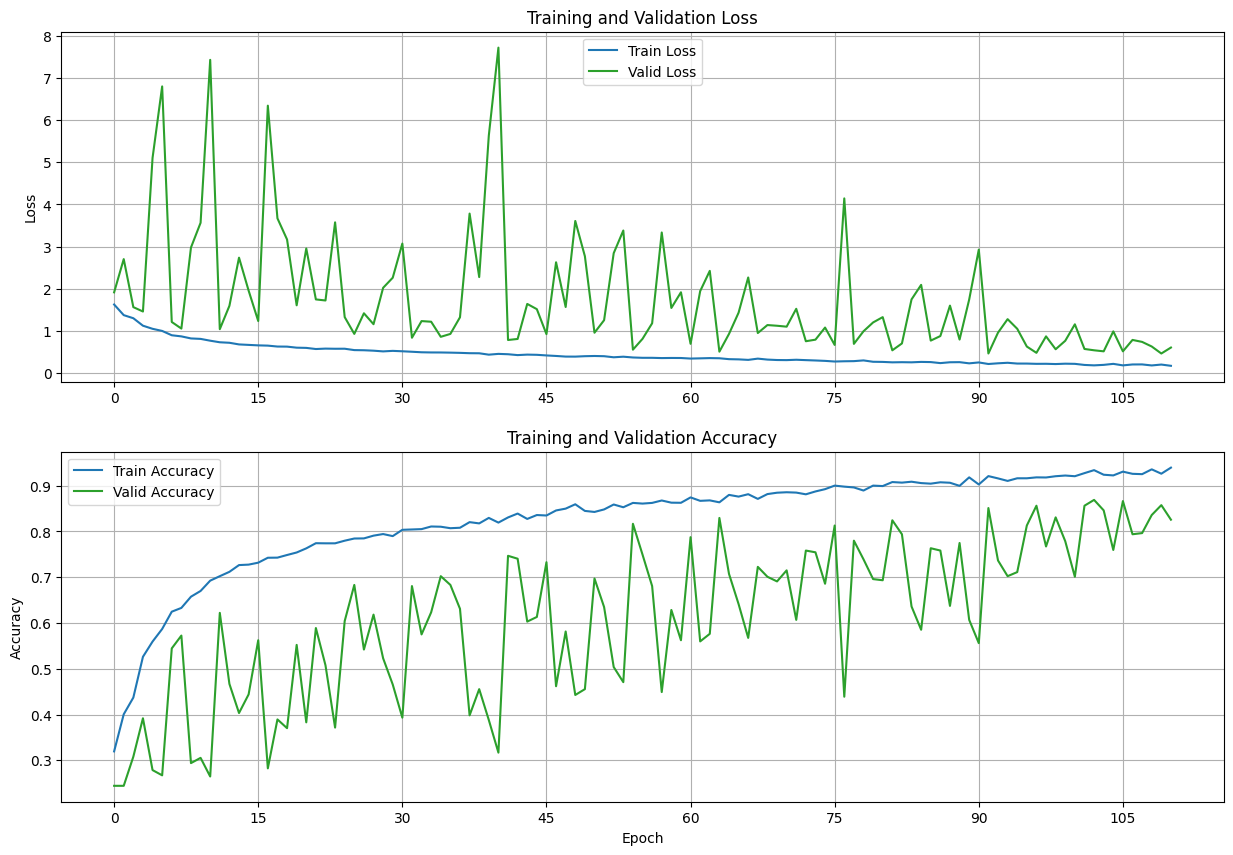

In [29]:
loss = training_results.history["loss"]
accuracy = training_results.history["accuracy"]

val_loss = training_results.history["val_loss"]
val_accuracy = training_results.history["val_accuracy"]

plot_history(
    train_loss=loss,
    train_metric=accuracy,
    val_loss=val_loss,
    val_metric=val_accuracy,
    loss_legend_loc="upper center",
    acc_legend_loc="upper left",
)

## <font style="color:blue">Reload the Model</font>

In [30]:
def recreate_model(path, load_weights=False, config=DatasetConfig(), **kwargs):
    """
    For reloading trained model
    Args:
        path: current_version checkpoint path
        load_weights: Whether the files saved at path contains model weights
                      or the Entire model configuration
        **kwargs: use to pass additional keyword arguments to the load_model method
    Returns:
        Reinitialized Trained Model
    """

    if load_weights:

        # Create model architecture
        model = get_model(num_classes=config.NUM_CLASSES, input_shape=config.DATA_SHAPE)

        # Load trained model best weights.
        path = os.path.join(path, "model.ckpt")
        model.load_weights(path).expect_partial()
    else:
        path = os.path.join(path, "model.keras")
        model = tf.keras.models.load_model(path, **kwargs)

    model.summary()
    return model

### <font style="color:green">Loading latest trained model version</font>

In [31]:
load_version = current_version_name
checkpoint_path = os.path.join(training_config.root_checkpoint_dir, load_version)

trained_model = recreate_model(checkpoint_path)

Model: "Original_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                 

## <font style="color:blue">Running Inference</font>

In [32]:
def get_sample_predictions(*, model, dataset, total=15):

    imgs = []
    ground_truths = []
    probs = []
    predictions = []

    idx_to_cls = {0: "cow", 1: "elephant", 2: "horse", 3: "spider"}

    print("Generating Predictions...")
    for data, target in dataset:
        model_predictions = model.predict_on_batch(data)
        cls_predicted = np.argmax(model_predictions, axis=-1)
        cls_probs = np.max(model_predictions, axis=-1)

        imgs.extend(data.numpy() / 255.)
        ground_truths.extend(target.numpy())
        predictions.extend(cls_predicted)
        probs.extend(cls_probs)

        # Displaying only 15 images
        if data.shape[0] >= total:
            break

    plt.style.use("default")
    plt.rcParams["figure.figsize"] = (18, 9)
    fig = plt.figure()
    fig.set_facecolor("white")

    # for idx in range(total):
    for idx in range(15):
        plt.subplot(3, 5, idx + 1)
        img = imgs[idx]
        plt.imshow(img)

        plt.title(f"P:{idx_to_cls[predictions[idx]]}({probs[idx]:.2}), T:{idx_to_cls[ground_truths[idx]]}")
        plt.axis("off")

    fig.savefig("sample_predictions.png")
    plt.show(block=block_plot)

    # del imgs, ground_truths, probs, predictions
    return ground_truths, predictions

Found 786 files belonging to 4 classes.
Generating Predictions...


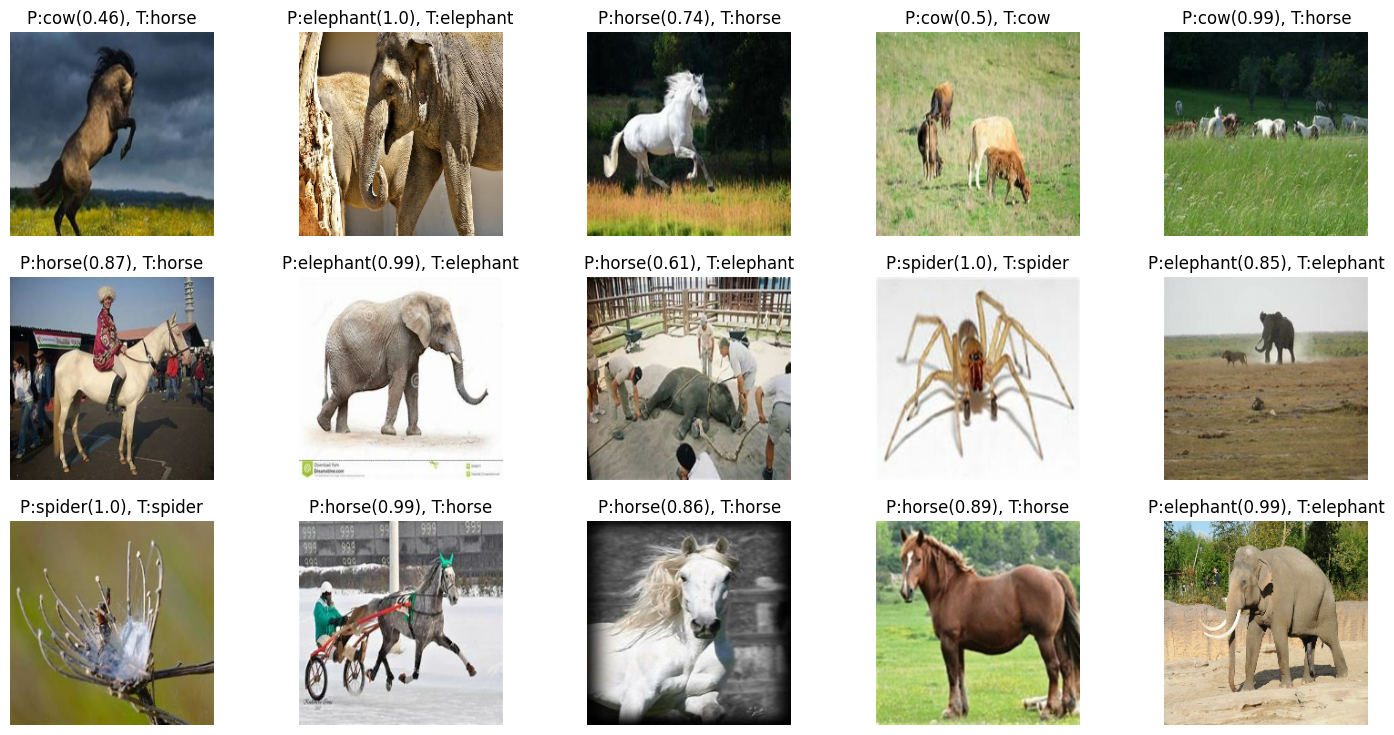

In [33]:
data_config = DatasetConfig()
training_config = TrainingConfig()

valid_path = os.path.join(data_config.DATA_ROOT, "Valid")

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    label_mode='int',
    color_mode='rgb',
    batch_size=training_config.BATCH_SIZE,
    image_size=data_config.DATA_SHAPE[:2],
    shuffle=True, # shuffling to show images from all classes
)

true_labels, predicted_labels = get_sample_predictions(model=trained_model, dataset=valid_dataset, total=400)

# <font style="color:red">Display Confusion Matrix</font>


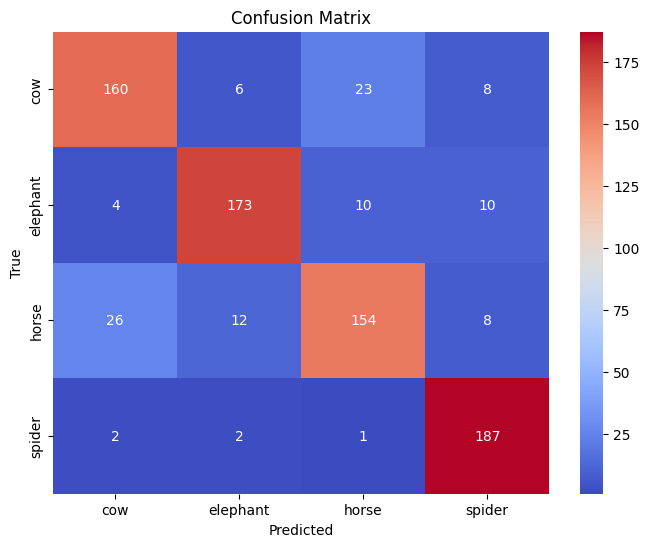

Classification Report:
              precision    recall  f1-score   support

         cow       0.83      0.81      0.82       197
    elephant       0.90      0.88      0.89       197
       horse       0.82      0.77      0.79       200
      spider       0.88      0.97      0.92       192

    accuracy                           0.86       786
   macro avg       0.86      0.86      0.86       786
weighted avg       0.86      0.86      0.86       786



In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['cow', 'elephant', 'horse', 'spider']

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# <font style="color:red">Generate Submission File</font>


In [35]:
import pandas as pd
import os
import shutil
import tensorflow as tf
from PIL import Image

def create_temp_directory(img_paths, labels, temp_dir="temp_dataset"):
    """
    Create a temporary directory with subfolders for each class based on the labels.

    Parameters:
        img_paths (list): List of image file paths.
        labels (list): List of class labels corresponding to each image.
        temp_dir (str): Name of the temporary directory to create.

    Returns:
        str: Path to the temporary directory.
    """
    # Clean up any existing temp directory
    if os.path.exists(temp_dir):
        shutil.rmtree(temp_dir)

    # Create class subdirectories
    for label in set(labels):
        os.makedirs(os.path.join(temp_dir, str(label)))

    # Copy images into class subdirectories
    for img_path, label in zip(img_paths, labels):
        dest_dir = os.path.join(temp_dir, str(label))
        shutil.copy(img_path, dest_dir)

    return temp_dir

test_csv = "./dataset/test.csv"
test_img_dir = "./dataset/dataset/Test"
submission_csv = "./dataset/submission.csv"

img_size = (224, 224)
batch_size = 32
class_labels = ["cow", "elephant", "horse", "spider"]
labels = [0,1,2,3]

# load the trained model
model = trained_model

test_data = pd.read_csv(test_csv)
img_ids = test_data.iloc[:, 0].values  # the first column contains image filenames

img_paths = [os.path.join(test_img_dir, img_id) for img_id in img_ids]


@tf.function
def preprocess_image(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, img_size)
    return image

def create_test_dataset(img_paths, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(img_paths)
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

test_dataset = create_test_dataset(img_paths, batch_size)

predictions = []
for batch in test_dataset:
    model_predictions = model.predict_on_batch(batch)
    # print(model_predictions)
    predicted_classes = np.argmax(model_predictions, axis=-1)
    # print(predicted_classes)
    predictions.extend([class_labels[idx] for idx in predicted_classes])

submission_df = pd.DataFrame({"ID": img_ids, "CLASS": predictions})
submission_df.to_csv(submission_csv, index=False)
print(f"Submission file saved to: {submission_csv}")

Submission file saved to: ./dataset/submission.csv


In [36]:
submission_df

,ID,CLASS
0,1017401.jpg,cow
1,1031491.jpg,cow
2,1032347.jpg,cow
3,1038920.jpg,cow
4,1041436.jpg,cow
...,...,...
1634,9852904.jpg,spider
1635,9942956.jpg,spider
1636,9954828.jpg,spider
1637,9964350.jpg,spider


In [37]:
submission_df['CLASS'].value_counts()

,count
CLASS,
spider,535
horse,427
cow,416
elephant,261
